## 1 Combining Data with Pandas

### 1.1 Introduction

In the last lesson, we worked with just one data set, the 2015 World Happiness Report, to explore **data aggregation**. However, it's very common in practice to **work with more than one data set at a time**.

Often, you'll find that you need additional data to perform analysis or you'll find that you have the data, but need to pull it from mulitiple sources. In this lesson, we'll learn a couple of different techniques for combining data using pandas to easily handle situations like these.

We'll use what we learned in the last lesson to analyze the **2015**, **2016**, and **2017 World Happiness Reports**. Specifically, we'll look to answer the following question:

- Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

As a reminder, these reports assign each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10, so "world happiness" refers to this definition specifically.

Below is a preview of the 2015 report:


| | Country | Region | Happiness Rank | Happiness Score | Standard Error | Economy (GDP per Capita) | Family | 
|---------|-------------|----------------|-----------------|----------------|--------------------------|---------|--------------------------|
| 0 | Switzerland | Western Europe | 1 | 7.587 | 0.03411 | 1.39651 | 1.34951 |
| 1 | Iceland | Western Europe | 2 | 7.561 | 0.04884 | 1.30232 | 1.40223 |
| 2 | Denmark | Western Europe | 3 | 7.527 | 0.03328 | 1.32548 | 1.36058 |
| 3 | Norway | Western Europe | 4 | 7.522 | 0.03880 | 1.45900 | 1.33095 |
| 4 | Canada | North America | 5 | 7.427 | 0.03553 | 1.32629 | 1.32261 |

Below are descriptions for some of the columns:

- **Country** - Name of the country
- **Region** - Name of the region the country belongs to
- **Happiness Rank** - The rank of the country, as determined by its happiness score
- **Happiness Score** - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10

Let's start by reading the **2015**, **2016**, and **2017** reports into a pandas dataframe and adding a **Year** column to each to make it easier to distinguish between them.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

We've already read the **World_Happiness_2015.csv** file into a dataframe called **happiness2015**.

- Use the **pandas.read_csv()** function to read the **World_Happiness_2016.csv** file into a dataframe called **happiness2016** and the **World_Happiness_2017.csv** file into a dataframe called **happiness2017**.
- Add a column called **Year** to each dataframe with the corresponding year. For example, the **Year** column in **happiness2015** should contain the value 2015 for each row.

In [1]:
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2015['Year'] = 2015
#put your code here
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2016['Year'] = 2016
happiness2017 = pd.read_csv("World_Happiness_2017.csv")
happiness2017['Year'] = 2017 

### 1.2 Combining Dataframes with the Concat Function

Let's start by exploring the [pd.concat()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html) function. The **concat()** function combines dataframes one of two ways:

1. Stacked: Axis = 0 (This is the default option.)

<left><img width="300" src="https://drive.google.com/uc?export=view&id=1CYdRFTWrhkt6MQC-4bo4uOjE8ZfG9jOt"></left>

2. Side by Side: Axis = 1

<left><img width="600" src="https://drive.google.com/uc?export=view&id=1D5NGhSzGARmchcnpjgcVgN7OsSU7aR7O"></left>

Since **concat** is a function, not a method, we use the syntax below:

<left><img width="500" src="https://drive.google.com/uc?export=view&id=1e-j71SCj4Ri8EP6QGDnko6w1XFqhKLGX"></left>

In the next exercise, we'll use the **concat()** function to combine subsets of **happiness2015** and **happiness2016** and then debrief the results on the following section.

Below are the subsets we'll be working with:


In [3]:
head_2015 = happiness2015[['Country',
                           'Happiness Score', 
                           'Year']].head(3)
head_2015

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015


In [4]:
head_2016 = happiness2016[['Country',
                           'Happiness Score', 
                           'Year']].head(3)
head_2016

,Country,Happiness Score,Year
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


Let's use the **concat()** function to combine **head_2015** and **head_2016** next.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

We've already saved the subsets from **happiness2015** and **happiness2016** to the variables **head_2015** and **head_2016**.

- Use the **pd.concat()** function to combine **head_2015** and **head_2016** along **axis = 0**. Remember to pass the **head_2015** and **head_2016** into the function as a list. Assign the result to **concat_axis0**.
- Use the **pd.concat()** function to combine **head_2015** and **head_2016** along **axis = 1**. Remember to pass **head_2015** and **head_2016** into the function as a list and set the **axis** parameter equal to 1. Assign the result to **concat_axis1**.
- Assign the number of rows in **concat_axis0** to a variable called **question1**.
- Assign the number of rows in **concat_axis1** to a variable called **question2**.


In [5]:
# put your code here
question1 = pd.concat([head_2015,head_2016], axis = 0)
question2 = pd.concat([head_2015,head_2016], axis = 1)
question1
question2

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


### 1.3 Combining Dataframes with the Concat Function Continued

When you reviewed the results from the last exercise, you probably noticed that we merely pushed the dataframes together vertically or horizontally - none of the values, column names, or indexes changed. For this reason, when you use the **concat()** function to combine dataframes with the same shape and index, you can think of the function as "gluing" dataframes together.

<left><img width="500" src="https://drive.google.com/uc?export=view&id=1XJOhkxKMokGHw7HMeSzOYxVJ8-bQiL-Z"></left>


However, what happens if the dataframes have different shapes or columns? Let's confirm the **concat()** function's behavior when we combine dataframes that don't have the same shape in the next exercise.

We'll work with the following subsets:

In [ ]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2015

In [ ]:
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
head_2016

Notice in the subsets above that **head_2015** contains one column that **head_2016** does not - the **Standard Error** column. Let's confirm what happens when we concatenate them next.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

We've already created the **head_2015** and **head_2016** variables.

- Use the **pd.concat()** function to combine **head_2015** and **head_2016** along **axis = 0**. Remember to pass the **head_2015** and **head_2016** into the function as a list. Assign the result to **concat_axis0**.


In [ ]:
# put your code here
concat_axis0 = pd.concat([head_2015,head_2016], axis = 0, sort = True)
concat_axis0

### 1.4 Combining Dataframes with Different Shapes Using the Concat Function

In the last exercise, we saw that the analogy of "gluing" dataframes together doesn't fully describe what happens when concatenating dataframes of different shapes. Instead, the function combined the data according to the corresponding column names:

<left><img width="700" src="https://drive.google.com/uc?export=view&id=19gyEqPO137B0vkALZfcQ4jDKHY504bF1"></left>


Note that because the **Standard Error** column didn't exist in **head_2016**, **NaN** values were created to signify those values are missing. By default, the **concat** function will keep ALL of the data, no matter if missing values are created.

Also, notice again the indexes of the original dataframes didn't change. If the indexes aren't meaningful, it can be better to reset them. This is especially true when we create duplicate indexes, because they could cause errors as we perform other data cleaning tasks.

Luckily, the **concat** function has a parameter, **ignore_index**, that can be used to clear the existing **index** and **reset** it in the result. Let's practice using it next.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Use the **pd.concat()** function to combine **head_2015** and **head_2016** along **axis = 0** again. This time, however, set the **ignore_index** parameter to **True** to reset the index in the result. Assign the result to **concat_update_index**.

In [ ]:
# put your code here
concat_update_index = pd.concat([head_2015,head_2016], axis = 0 , ignore_index = True, sort= True)
concat_update_index

### 1.5 Joining Dataframes with the Merge Function

Next, we'll explore the [pd.merge() function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) - a function that can execute high performance database-style joins. Note that unlike the **concat** function, the **merge** function only combines dataframes horizontally (axis=1) and **can only combine two dataframes at a time**. However, it can be valuable when we need to combine very large dataframes quickly and provides more flexibility in terms of how data can be combined, as we'll see in the next couple sections.

With the **merge()** function, we'll combine dataframes on a **key**, a **shared index** or **column**. When choosing a key, it's good practice to use keys with unique values to avoid duplicating data.

You can think of keys as creating a link from one dataframe to another using the common values or indexes. For example, in the diagram below, we linked the dataframes using common values in the Country columns.

<left><img width="400" src="https://drive.google.com/uc?export=view&id=1ZBKNem91tjiV0XzcJSQGUgfm90ihmCMr"></left>

In the diagram below, we use those common country values to join or merge the dataframes.

<left><img width="700" src="https://drive.google.com/uc?export=view&id=1t5ioaNiXdnkWKGwVh3cpFbJLKCqTLoU7"></left>


We'll explore the merge function in the next exercise using just three rows from **happiness2015** and **happiness2016**:

In [ ]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2015

In [ ]:
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016

We'll use the following syntax:

<left><img width="600" src="https://drive.google.com/uc?export=view&id=1mApwE1qMRnbUmBSa7D5jf93XuTbmQDB3"></left>

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


We've already saved three rows from **happiness2015** and **happiness2016** to variables named **three_2015** and **three_2016**.

- Use the **pd.merge()** function to join **three_2015** and **three_2016** on the **Country** column. Assign the result to **merged**.


In [ ]:
# put your code here
merged = pd.merge(left = three_2015, right = three_2016, on = 'Country')
merged

### 1.6 Joining on Columns with the Merge Function

Joining three_2015 and three_2016 in the last exercise resulted in a dataframe with just one row.

Let's look back to **three_2015** and **three_2016** to understand why. Since we joined the dataframes on the **Country** column, or used it as the **key**, the **merge()** function looked to match elements in the **Country** column in **BOTH** dataframes.

<left><img width="600" src="https://drive.google.com/uc?export=view&id=1z300DyQ7dUwHNlnz--gfcCh7x6rkGunL"></left>


The one country returned in **merged** was **"Norway"**, the only element that appeared in the **Country** column in **BOTH** **three_2015** and **three_2016**.

This way of combining, or joining, data is called an **inner join**. An **inner join returns only the intersection of the keys**, or the elements that appear in both dataframes with a common key.

The term **"join"** originates from **SQL** (or structured query language), a language used to work with databases. If you're a SQL user, you'll recognize the following concepts. If you've never used SQL, don't worry! No prior knowledge is neccessary for this lesson.

There are actually four different types of joins:

- **Inner**: only includes elements that appear in both dataframes with a common key
- **Outer**: includes all data from both dataframes
- **Left**: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes
- **Right**: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes

If the definition for outer joins sounds familiar, it's because we've already seen examples of outer joins! Recall that when we combined data using the **concat** function, it kept all of the data from all dataframes, no matter if missing values were created.

Since it's much more common to use **inner** and **left joins** for database-style joins, we'll focus on these join types for the remainder of the lesson, but encourage you to explore the other options on your own.

Let's experiment with changing the join type next.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Update **merged** to use a **left join** instead of an **inner join**. Set the **how** parameter to **'left'** in **merge()**. Assign the result to **merged_left**.
- Update **merged_left** so that the **left** parameter equals **three_2016** and the **right** parameter equals **three_2015**. Assign the result to **merged_left_updated**.
- Based on the results of this exercise, when using a **left join**, does changing the dataframe assigned to the left and right parameters change the result? Try to answer this question before moving onto the next section

In [ ]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(left=three_2015, right=three_2016, on='Country')

#put your code here
merged_left = pd.merge(left=three_2015, right=three_2016,how ='left', on='Country')
merged_left
merged_left_updated = pd.merge(left=three_2016, right=three_2015,how ='left', on='Country')
merged_left_updated

### 1.7 Left Joins with the Merge Function

Let's summarize what we learned in the last exercise:

- Changing the join type from an **inner join** to a **left join** resulted in a dataframe with more rows and created **NaNs**.
- When using a **left join**, interchanging the dataframes assigned to the left and right parameters changes the results.

Let's look into the results in more detail. First, let's look at the case in which the "left" dataframe is **three_2015** and the "right" dataframe is **three_2016**:

In [ ]:
pd.merge(left=three_2015, right=three_2016, how='left', on='Country')

Recall that a left join includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key.

<left><img width="700" src="https://drive.google.com/uc?export=view&id=1IGRy--ZJcljf0th7y9VK7HNN5M-q9Oq3"></left>


Since the **Country** column was used as the key, only countries that appear in **BOTH** dataframes have a value in every column. **"Norway"** was the only value in the **Country** column in **BOTH** dataframes, so it's the only row with a value in every column.

When we interchanged the "left" and the "right" dataframes, the values changed:




In [ ]:
pd.merge(left=three_2016, right=three_2015, how='left', on='Country')

This time, we kept all of the rows from **three_2016**. **"Norway"** was still the only value in the **Country** column in **BOTH** dataframes, so it's the only row with a value in every column.

<left><img width="700" src="https://drive.google.com/uc?export=view&id=1tG4WWHIM1Fc41R2-CJrG8IBlBam2lGh0"></left>

In summary, we'd use a **left join** when we don't want to drop any data from the left dataframe.

Note that a **right join** works the same as a **left join**, except it includes all of the rows from the "right" dataframe. Since it's far more common in practice to use a left join, we won't cover right joins in detail.

You may have also noticed above that the merge function added a suffix of either **_x** or **_y** to columns of the same name to distinguish between them.

Let's update those suffixes next to make our results easier to read.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Update **merged** to use the suffixes **_2015** and **_2016**. Set the **suffixes** parameter to **('_2015', '_2016')** in **merge()**. Assign the result to **merged_suffixes**.
- Update **merged_updated** to use the suffixes **_2015** and **_2016**. Notice that the "left" dataframe is **three_2016** and the "right" dataframe is **three_2015**. Assign the result to **merged_updated_suffixes**.

In [ ]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
merged_updated = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country')
# put your code here
merged_left_updated
marged_suffixes = pd.merge(left=three_2015, right=three_2016, how = 'left', on='Country', suffixes=['_2015','_2016'])
marged_suffixes
merged_updated_suffixes =  pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country', suffixes=['_2016','_2015'])
merged_updated_suffixes

### 1.8 Join on Index with the Merge Function

Now that we have a good understanding of how to join dataframes on specific columns, let's look at another way to join dataframes - **on the index**.

<left><img width="200" src="https://drive.google.com/uc?export=view&id=1qFNgVIytv1vkBGr0QTMyDPIqm4aG8JCQ"></left>


In this section, we'll work with the following two subsets of **happiness2015** and **happiness2016**:



In [2]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
four_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015
5,Finland,6,2015


In [3]:
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


We'll join **happiness2015** and **happiness2016** **on index** using an **inner join**, so that the result contains only the elements in the key that appear in BOTH dataframes. First, though, let's make a prediction. How many rows and columns do you think the result will have? Write down your answer before you continue reading.

To join on the index, we'll set the **left_index** and **right_index** parameters to **True**:

In [4]:
pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015','_2016'))

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


Was your prediction correct? Based on our experience with joining on columns, you may have predicted the output would have just two rows, since only "Finland" and "Norway" appear in both dataframes. When we join on index, however, our result will contain only common indexes.

<left><img width="400" src="https://drive.google.com/uc?export=view&id=1DPEg-1Y2fVWZLAh_axHVJN6bjPWBV2tS"></left>

Let's explore what happens when we join on index with a left join instead.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


We've already saved **four_2015** and **three_2016**. In this exercise, we'll use a **left join** to combine **four_2015** and **three_2016**.

- Predict the number of rows and columns the resulting dataframe will have. Assign the number of rows to a variable called **rows** and the number of columns to a variable called **columns**.
- To change the join type used in **merge_index** to a left join, set the **how** parameter equal to 'left'. Save the result to **merge_index_left**.
- Update **rows** and **columns** so that each contains the correct number of rows and columns in **merge_index_left**.

In [5]:
import pandas as pd
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index = pd.merge(left = four_2015,
                       right = three_2016, 
                       left_index = True, 
                       right_index = True, 
                       suffixes = ('_2015','_2016'))
# put your code here
linhas = 7
colunas = 6

merge_index_left = pd.merge(left = four_2015,
                       right = three_2016, 
                        how = 'left',
                       left_index = True, 
                       right_index = True, 
                       suffixes = ('_2015','_2016'))
# wrong in the columns I puted 4 but really 6
linhas = 7
colunas = 4

merge_index

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


### 1.9 Challenge: Combine Data and Create a Visualization

Let's summarize what we learned in this mission:

<left><img width="600" src="https://drive.google.com/uc?export=view&id=1DTt7S1NSRCbIC1NMepRWsw-hyz0YjVRG"></left>


You may still be wondering about when to use each of the functions and methods we've learned. This table can help you understand the limitations of each, but that decision will mostly depend on the problem you're trying to solve.

Let's review our original question next:

- **Did world happiness increase, decrease, or stay about the same from 2015 to 2017**?

To answer this question, we'll create a bar plot in which each bar represented the mean happiness score for one of the years. We completed a similar task in the last lesson when we calculated the mean happiness score for each region using the **df.pivot_table()** method:

In [6]:
import numpy as np
#Use a pivot table to aggregate the data according to Region.
means = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=np.mean)
means

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


Then, we plotted the results with the **df.plot()** method.

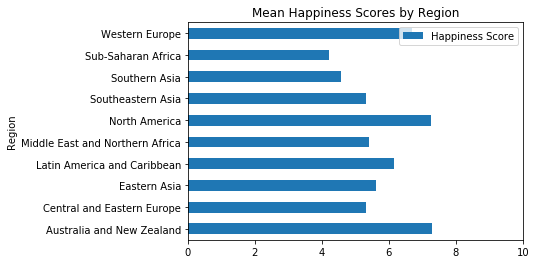

In [9]:
#Use the `df.plot()` method to plot the results.
means.plot(kind='barh', 
           title='Mean Happiness Scores by Region', 
           xlim=(0,10))


Let's repeat the same steps, but this time, we'll group the data by the **Year** column. First, let's rename the **Happiness.Score** column so it matches the colum name in **happiness2015** and **happiness2016**:

In [10]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

Next, we need to combine **happiness2015**, **happiness2016**, and **happiness2017**, so that we can group the result by the **Year** column.

Let's use what we learned in this lesson to combine the dataframes.


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

We've already created a **Year** column in **happiness2017** and renamed the **Happiness.Score** column to **Happiness Score**.

- Use either the **pd.concat()** function or the **pd.merge()** function to combine **happiness2015**, **happiness2016**, and **happiness2017**. Assign the result to **combined**.
  - Think about whether you need to combine the data horizontally or vertically in order to create a dataframe that can be grouped by year, and decide which function (pd.concat() or pd.merge()) you can use to combine the data.
- Use the **df.pivot_table()** method to create a pivot table from the combined dataframe. Set **Year** as the index and **Happiness Score** as the values. Assign the result to **pivot_table_combined**.
- Use the **df.plot()** method to create a bar chart of the results. Set the kind parameter to **barh**, the title to **'Mean Happiness Scores by Year'**, and the **xlim** parameter to **(0,10)**.
- Try to answer the following question based on the results of this exercise: Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

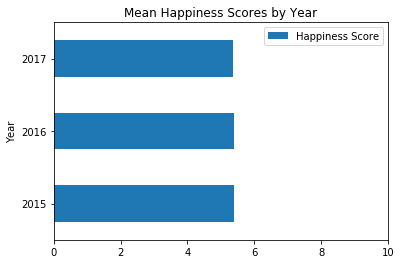

In [19]:
# put your code here

# happiness2016 = happiness2016.drop(['Dystopia Residual'], axis=1)
# happiness2016.info()

# def clean_col(col):
#     col = col.replace('Happiness.Rank','Happiness Rank')
#     col = col.replace('Happiness.Score',  'Happiness Score')
#     col = col.replace('Economy..GDP.per.Capita.', 'Economy (GDP per Capita)')
#     col = col.replace('Health..Life.Expectancy.', 'Health (Life Expectancy)')
#     col = col.replace('Trust..Government.Corruption.',  'Trust (Government Corruption)')
#     col = col.replace('Dystopia.Residual','Dystopia Residual')
#     return col

# happiness2017.columns = [clean_col(c) for c in happiness2017.columns]
# put your code here

# combined = pd.concat([happiness2015,happiness2017,happiness2016], axis = 0, sort=True )
# combined
pivot_table_combined = combined.pivot_table('Happiness Score', 'Year')
pivot_table_combined

pivot_table_combined.plot(kind='barh', 
           title='Mean Happiness Scores by Year', 
           xlim=(0,10))



### 1.10 Next steps

In the last exercise, we confirmed that the mean world happiness score stayed approximately the same from 2015 to 2017.

In this lesson, we learned how to combine data using the **pd.concat()** and **pd.merge()** functions. In your travels with pandas, you may happen upon the **df.append()** and **df.join()** methods, which are basically shortcuts for the **concat()** and **merge()** functions. We didn't cover them in this lesson, as the differences are few, but if you want to learn more about them, check out this [documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html).

As we saw in the last section, in order to perform more complex analysis, we have to be able to **clean** and **manipulate** data, whether it be adding data to a dataframe or renaming a column. In the next lessons, we'll continue building on what we've learned so far as we learn ways to **transform** and **reshape** our data.